# Yelp Review - Data Visualization

*Raunak Mundada, Peter Wendel, Nibhrat Lohia*

## Business Understanding

One’s ability of making decisions is largely dependent on others opinions with similar experiences. In today’s era of internet and information, it has become easier to find people with similar experiences you are looking for and website services like Yelp are playing an important role in making such information readily available. These reviews shared by service users are valuable for both business owners and prospective customers. The reviews consists of text description, star ratings, reviewer’s information, business descriptions for various categories (as defined by Yelp) etc. People can also vote on user reviews if they find it useful, funny or cool. The goal is to classify sentiments using the enormous review data text and predict the success or failure of a business. Here, we plan to conduct a sentiment analysis of the text description of the reviews received for food businesses in Charlotte. The idea is to find attributes that result in high ratings and thus suggest improvements in certain services in order to attract more customers. Some of the questions we will be interested in includes; how well we can guess a review's rating from its text alone? What are the most common positive and negative words used in reviews? Can we extract tips from reviews? Is it possible to predict the closure of a business based on the reviews received?


Here in the first phase, we focus on visualizations (graphs, plots and maps) to explore the data in a way that can be useful for further analysis. We look at how the location, keywords and attributes affect the success of the business. Focussing on keywords from the reviews, it's sentiment and other significant effects caused by the attributes of a business we can model the success or failure of a business. This idea can be further extended to analyse the reviews and the attributes of a business and predict its success or failure. It can further provide suggestions to help businesses to improve and succeed.

We look at the Charlotte food businesses from the following perspective - 
1. How does location affect a business?
2. What keywords define the location?
3. Which attributes define a location?

We intend to measure the effectiveness of the model based on classification accuracy of Yelp's historical data. Based on the model, we can then define the important features of a successful food business in Charlotte.

## Data Description

The user review data has been publicly released by Yelp for dataset challenge (https://www.yelp.com/dataset_challenge). The released data consists of 2.7M reviews and 649K tips by 687K users for 86K businesses. However, to simplify our approach, we have only considered review data of Charlotte City and for food businesses. We used 3 major categories of data namely; Business, Review and User. These broad categories consists of attributes of similar class, the details of which are listed below.


To run this notebook, please set your data directory path in the following cell. To download the data, follow the dropbox link.
Dropbox Link - https://www.dropbox.com/sh/pmvxzxq430h5b12/AAAQqN6ykeqqJ00LyNvxzlCza?dl=0

The data as provided by Yelp is stored in json format. The following json_to_csv converter is used to convert the files to csv.

Json-to-CSV converter: https://github.com/Yelp/dataset-examples/blob/master/json_to_csv_converter.py

The description of the attributes used for the analysis is given in the following table - 

In [1]:
import sys
import pandas as pd
sys.path.insert(0,'.\Data\\')
pd.read_excel('Data description.xlsx')

,Variable Name,Variable Type,Descrition,Class
0,type,nominal,"type of business (Food, Finance, etc)",Business
1,business ID,nominal,Encrypted Business ID,Business
2,name,nominal,Business Name,Business
3,neighborhoods,nominal,name of neighborhood,Business
4,city,nominal,city name,Business
5,state,nominal,stat name,Business
6,latitude,interval,latitudinal position,Business
7,longitude,interval,longituinal position,Business
8,stars,ordinal,average star rating rounded to (1/2),Business
9,review_count,interval,count of review,Business


## Data Quality - Comments

The review data is a complex dataset across multiple dimensions. The attributes we have used are mostly those which have at least 70% data present and thus are statistically significant. The only feature that is not allowed for missing values is the business ID. The decision to remove such rows were taken for the following reasons:

1. They constitute of less than 1% of total restaurants and are statistically insignificant.
2. There is no other way that these business ID’s can be recovered thus making the merging process practically impossible.

Other treatments on the data quality are commented as and when they are implemented below.

In [2]:
# Import required modules
from __future__ import division

import os
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='raunakm90', api_key='qh9wd16d6g')
import plotly.tools as tls

from plotly.graph_objs import *

%matplotlib inline

## Analysis of Business Dataset

Read the yelp business dataset. Sub-sample the dataset for Charlotte food businesses. 
We have grouped the food business on the following categories defined by Yelp:
1. Food
2. Restaurants
3. Nightlife

In [3]:
business_df = pd.read_csv(".\Data\yelp_academic_dataset_business.csv")
charlotte_business = business_df.loc[business_df['city'] == 'Charlotte']
food_charlotte_business = pd.DataFrame()
food_categories = ['Food','Restaurants','Nightlife']
for index,row in charlotte_business.iterrows():
    if any(category in row.categories for category in food_categories):
        food_charlotte_business = food_charlotte_business.append(row)
del business_df,charlotte_business
food_charlotte_business.head()

C:\Users\Raunak Mundada\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.



,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Attire,attributes.BYOB,attributes.BYOB/Corkage,attributes.By Appointment Only,attributes.Caters,attributes.Coat Check,attributes.Corkage,attributes.Delivery,attributes.Dietary Restrictions.dairy-free,attributes.Dietary Restrictions.gluten-free,attributes.Dietary Restrictions.halal,attributes.Dietary Restrictions.kosher,attributes.Dietary Restrictions.soy-free,attributes.Dietary Restrictions.vegan,attributes.Dietary Restrictions.vegetarian,attributes.Dogs Allowed,attributes.Drive-Thru,attributes.Good For Dancing,attributes.Good For Groups,attributes.Good For.breakfast,attributes.Good For.brunch,attributes.Good For.dessert,attributes.Good For.dinner,attributes.Good For.latenight,attributes.Good For.lunch,attributes.Good for Kids,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.asian,attributes.Hair Types Specialized In.coloring,attributes.Hair Types Specialized In.curly,attributes.Hair Types Specialized In.extensions,attributes.Hair Types Specialized In.kids,attributes.Hair Types Specialized In.perms,attributes.Hair Types Specialized In.straightperms,attributes.Happy Hour,attributes.Has TV,attributes.Music.background_music,attributes.Music.dj,attributes.Music.jukebox,attributes.Music.karaoke,attributes.Music.live,attributes.Music.video,attributes.Noise Level,attributes.Open 24 Hours,attributes.Order at Counter,attributes.Outdoor Seating,attributes.Parking.garage,attributes.Parking.lot,attributes.Parking.street,attributes.Parking.valet,attributes.Parking.validated,attributes.Price Range,attributes.Smoking,attributes.Take-out,attributes.Takes Reservations,attributes.Waiter Service,attributes.Wheelchair Accessible,attributes.Wi-Fi,business_id,categories,city,full_address,hours.Friday.close,hours.Friday.open,hours.Monday.close,hours.Monday.open,hours.Saturday.close,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
889,1.0,NaN,NaN,none,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,casual,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0,free,Gw5POFxBRoJxN_ZYhk6lgQ,"['Food', 'Sandwiches', 'Bagels', 'Breakfast & ...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,16:00,5:30,16:00,5:30,16:00,6:00,16:00,6:00,16:00,5:30,16:00,5:30,16:00,5:30,35.089035,-80.867055,Bruegger's Bagels,[],1.0,17.0,4.0,NC,business
902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,MMgjU4K0D9RLsb7BWEic4g,"['Sandwiches', 'Pizza', 'Chicken Wings', 'Rest...",Charlotte,"8510 Park Rd\nCharlotte, NC 28210",1:00,10:30,0:00,10:30,1:00,10:30,0:00,10:30,0:00,10:30,0:00,10:30,0:00,10:30,35.117183,-80.857545,Domino's Pizza,[],1.0,8.0,3.0,NC,business
933,1.0,NaN,NaN,none,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,casual,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0,no,LT0AgHTpDifuHSXgyLmJwg,"['American (Traditional)', 'Hot Dogs', 'Breakf...",Charlotte,"309 W 4th St\nCharlotte, NC 28202",15:00,7:3

In [4]:
print (food_charlotte_business.info())
print (food_charlotte_business.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 889 to 85900
Data columns (total 98 columns):
attributes.Accepts Credit Cards                         2636 non-null float64
attributes.Accepts Insurance                            3 non-null float64
attributes.Ages Allowed                                 15 non-null object
attributes.Alcohol                                      1891 non-null object
attributes.Ambience.casual                              1719 non-null float64
attributes.Ambience.classy                              1719 non-null float64
attributes.Ambience.divey                               1719 non-null float64
attributes.Ambience.hipster                             1719 non-null float64
attributes.Ambience.intimate                            1719 non-null float64
attributes.Ambience.romantic                            1719 non-null float64
attributes.Ambience.touristy                            1719 non-null float64
attributes.Ambience.trendy             

Map 1 and 0 to True and False for required attribute columns

In [5]:
    # Convert selected columns to boolean type
    col_dict_bool = {'attributes.Accepts Credit Cards':np.bool,'attributes.Accepts Insurance':np.bool,
                     'attributes.Ambience.casual':np.bool,'attributes.Ambience.classy':np.bool,'attributes.Ambience.divey':np.bool,
                     'attributes.Ambience.hipster':np.bool,'attributes.Ambience.intimate':np.bool,
                     'attributes.Ambience.romantic':np.bool,'attributes.Ambience.touristy':np.bool,
                     'attributes.Ambience.trendy':np.bool, 'attributes.Ambience.upscale':np.bool,'attributes.BYOB':np.bool,
                     'attributes.By Appointment Only':np.bool,
                     'attributes.Caters':np.bool,'attributes.Coat Check':np.bool,'attributes.Corkage':np.bool,
                     'attributes.Delivery':np.bool,'attributes.Dietary Restrictions.dairy-free':np.bool,
                     'attributes.Dietary Restrictions.gluten-free':np.bool,
                     'attributes.Dietary Restrictions.halal':np.bool,'attributes.Dietary Restrictions.kosher':np.bool,
                     'attributes.Dietary Restrictions.soy-free':np.bool,'attributes.Dietary Restrictions.vegan':np.bool,
                     'attributes.Dietary Restrictions.vegetarian':np.bool,'attributes.Dogs Allowed':np.bool,
                     'attributes.Drive-Thru':np.bool,'attributes.Good For Dancing':np.bool,'attributes.Good For Groups':np.bool,
                     'attributes.Good For.breakfast':np.bool,'attributes.Good For.brunch':np.bool,
                     'attributes.Good For.dessert':np.bool,'attributes.Good For.dinner':np.bool,
                     'attributes.Good For.latenight':np.bool,'attributes.Good For.lunch':np.bool,'attributes.Good for Kids':np.bool,
                     'attributes.Happy Hour':np.bool,'attributes.Has TV':np.bool,'attributes.Music.background_music':np.bool,
                     'attributes.Music.dj':np.bool,'attributes.Music.jukebox':np.bool,
                     'attributes.Music.karaoke':np.bool,'attributes.Music.live':np.bool,
                     'attributes.Music.video':np.bool,'attributes.Open 24 Hours':np.bool,'attributes.Order at Counter':np.bool,
                     'attributes.Outdoor Seating':np.bool,'attributes.Parking.garage':np.bool,'attributes.Parking.lot':np.bool,
                     'attributes.Parking.street':np.bool,'attributes.Parking.valet':np.bool,'attributes.Parking.validated':np.bool,
                     'attributes.Take-out':np.bool,'attributes.Takes Reservations':np.bool,'attributes.Waiter Service':np.bool,
                     'attributes.Wheelchair Accessible' :np.bool, 'open':np.bool          
                    }
    map_dict = {0:False, 1:True}
    # Mapping
    for col in food_charlotte_business.columns:
        if col in col_dict_bool.keys():
            food_charlotte_business[col] = food_charlotte_business[col].map(map_dict)

In [6]:
#Drop columns that have only NaN
food_charlotte_business = food_charlotte_business.dropna(axis = 1,how = 'all')
print (food_charlotte_business.shape)
food_charlotte_business.describe()

(2744, 90)


,attributes.Price Range,latitude,longitude,review_count,stars
count,2624.000000,2744.000000,2744.000000,2744.000000,2744.000000
mean,1.583841,35.196850,-80.832399,45.046283,3.478863
std,0.602939,0.076465,0.059691,75.176630,0.760580
min,1.000000,35.022459,-81.016171,3.000000,1.000000
25%,1.000000,35.150317,-80.856159,7.000000,3.000000
50%,2.000000,35.210659,-80.841148,19.000000,3.500000
75%,2.000000,35.228943,-80.797314,52.000000,4.000000
max,4.000000,35.384064,-80.654704,1121.000000,5.000000


Let's see the number of missing values in the business dataset

In [7]:
na_perc = {}
for col in food_charlotte_business.columns:
    na_perc[col] = food_charlotte_business[col].isnull().sum()*100/len(food_charlotte_business)

In [8]:
food_charlotte_business[food_charlotte_business['attributes.Accepts Insurance'].notnull()]
na_perc

{'attributes.Accepts Credit Cards': 3.935860058309038,
 'attributes.Accepts Insurance': 99.890670553935863,
 'attributes.Ages Allowed': 99.453352769679299,
 'attributes.Alcohol': 31.08600583090379,
 'attributes.Ambience.casual': 37.354227405247812,
 'attributes.Ambience.classy': 37.354227405247812,
 'attributes.Ambience.divey': 37.354227405247812,
 'attributes.Ambience.hipster': 37.354227405247812,
 'attributes.Ambience.intimate': 37.354227405247812,
 'attributes.Ambience.romantic': 37.354227405247812,
 'attributes.Ambience.touristy': 37.354227405247812,
 'attributes.Ambience.trendy': 37.354227405247812,
 'attributes.Ambience.upscale': 37.937317784256557,
 'attributes.Attire': 30.247813411078717,
 'attributes.BYOB': 98.833819241982511,
 'attributes.BYOB/Corkage': 98.432944606413997,
 'attributes.By Appointment Only': 98.141399416909621,
 'attributes.Caters': 49.526239067055393,
 'attributes.Coat Check': 86.370262390670547,
 'attributes.Corkage': 99.416909620991248,
 'attributes.Deliver

As can be seen, there are quite a few columns that have more than 70% missing values. We will drop these columns for now. 
(70% is an arbitary choice of number. It will be difficult to interpret any results from such data and imputation may not be the ideal way to go about it). Going further, missing values (NaN's) are ignored for the current analysis. 

In [9]:
for key,value in na_perc.items():
    if value > 70:
        food_charlotte_business.drop(key,axis = 1,inplace=True)
food_charlotte_business.shape

(2744, 63)

We will check for duplicates based on the business id. 

In [10]:
print (len(food_charlotte_business.business_id.unique()))
food_charlotte_business.business_id.loc[food_charlotte_business.business_id.duplicated()]

2716


1065     #NAME?
1367     #NAME?
11682    #NAME?
12177    #NAME?
12310    #NAME?
12503    #NAME?
20448    #NAME?
21130    #NAME?
39730    #NAME?
39871    #NAME?
40332    #NAME?
40392    #NAME?
49302    #NAME?
50406    #NAME?
50652    #NAME?
58942    #NAME?
59592    #NAME?
63292    #NAME?
64180    #NAME?
70388    #NAME?
70636    #NAME?
74357    #NAME?
75163    #NAME?
76741    #NAME?
77539    #NAME?
78524    #NAME?
81075    #NAME?
81892    #NAME?
Name: business_id, dtype: object

The above business id's are undefined in the original dataset. We will drop these rows.

In [11]:
food_charlotte_business.drop_duplicates(subset = ['business_id'],keep = False,inplace = True)

In [12]:
print (len(food_charlotte_business))
print (len(food_charlotte_business.business_id.unique()))

2715
2715


### Frequency of open and closed businesses

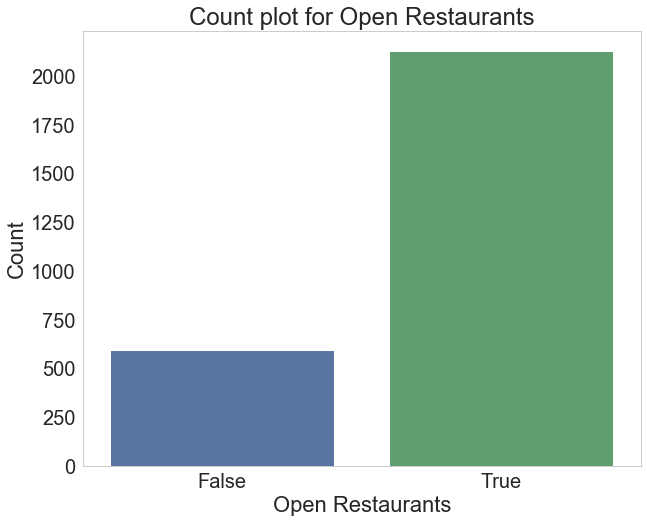

In [13]:
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (10, 8)})
sns.set_style("whitegrid")
#Author = Author.sort_values('Author_Cited_By')
#labels = Author.Author_Name
g = sns.countplot(x = 'open', data = food_charlotte_business)
#g.set_xticklabels(labels,rotation = 90)
plt.title("Count plot for Open Restaurants")
plt.xlabel('Open Restaurants')
plt.ylabel('Count')
g.axes.grid('off')
#sns.set(font_scale=15)

In the above plot, we see that almost 20% of the reviewed restaurants are actually listed as no longer operational. This may be because they shut due to lack of enough business or changes in operating conditions (eg.- due to a new establishment that restricted restaurant’s operation). We will further analyze the reasons of such failures considering that the major reason for shutting down is low revenue generation.

### Star rating distribution by status of business

(0, 6)

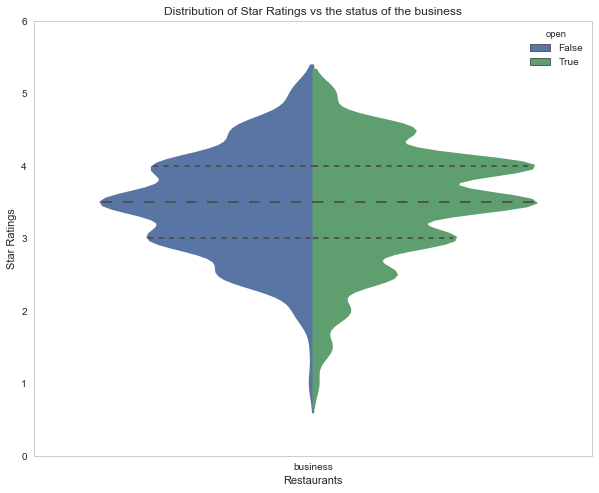

In [14]:
#violin plot for open and closed stars
sns.set(font_scale = 1)
sns.set_context({"figure.figsize": (10, 8)})
sns.set_style("whitegrid")

g = sns.violinplot(x='type',y = 'stars',hue='open', data = food_charlotte_business,
                  split=True,inner="quart")

plt.title("Distribution of Star Ratings vs the status of the business")
plt.xlabel('Restaurants')
plt.ylabel('Star Ratings')
g.axes.grid('off')
plt.ylim(0, 6)

Contrary to intuition, this plot shows that the median star rating is identical for closed and open restaurants, but it appears the open restaurant distribution has more highly rated restaurants, evidenced by the bimodal humps. Clearly, star ratings are not the only factor that leads to the close of a restaurant. Or one can even consider the ratings distribution during the time which may lead to interesting facts.

In [15]:
neighborhoods_1 = list()
neighborhoods_2 = list()
for item in food_charlotte_business.neighborhoods:
    ngh = item.strip('[]')
    ngh = ngh.strip().split(',')
    if (len(ngh) == 1) and ngh[0] != "":
        #print ("Only one neighborhood")
        neighborhoods_1.append(ngh[0].strip("'"))
        neighborhoods_2.append(np.nan)
    elif (len(ngh) == 2):
        #print ("Two neighboorhoods")
        neighborhoods_1.append(ngh[0].strip("'"))
        neighborhoods_2.append(ngh[1].strip("'"))
    else:
        #print ("No Neighborhood")
        neighborhoods_1.append(np.nan)
        neighborhoods_2.append(np.nan)

food_charlotte_business['neighborhoods_1'] = pd.Series(neighborhoods_1,index = food_charlotte_business.index)
food_charlotte_business['neighborhoods_2'] = pd.Series(neighborhoods_2,index = food_charlotte_business.index)
food_charlotte_business[['neighborhoods','neighborhoods_1','neighborhoods_2']].head()

,neighborhoods,neighborhoods_1,neighborhoods_2
889,[],NaN,NaN
902,[],NaN,NaN
933,[],NaN,NaN
935,['Uptown'],Uptown,NaN
938,['Fourth Ward'],Fourth Ward,NaN


We split the neighbourhoods into primary and secondary neighbourhoods.

In [16]:
# Neighborhood not defined
print (food_charlotte_business.neighborhoods_1.isnull().sum()/len(food_charlotte_business)*100)
print (food_charlotte_business.neighborhoods_1.unique())
print (food_charlotte_business.neighborhoods_2.unique())

27.8084714549
[nan 'Uptown' 'Fourth Ward' 'Third Ward' 'First Ward' 'Arboretum'
 'South End' 'Dilworth' 'South Park' 'Cotswold' 'Starmount' 'Myers Park'
 'Elizabeth' 'NoDa' 'North Charlotte' 'Steele Creek' 'Paw Creek'
 'Ballantyne' 'Eastland' 'Sherwood Forest' 'University City' 'Biddleville'
 'Derita' 'Highland Creek' 'Plaza Midwood' 'Sedgefield' 'Villa Heights'
 'Quail Hollow']
[nan " 'Dilworth" " 'Eastland" " 'Starmount" " 'NoDa" " 'Elizabeth"
 " 'Myers Park"]


As shown above, there are 27.80% business where the neighbourhood is not defined. We ignore these values in the following analysis to find out the importance of a location since we cannot infer their neighbourhood yet. We assume that the available 73% of the data is statistically significant.

### What differentiates the locations in Charlotte?

#### Review count by neighbourhood

In [18]:
group_neighborhood = food_charlotte_business.groupby('neighborhoods_1')

open_food=food_charlotte_business[food_charlotte_business['open']]
closed_food=food_charlotte_business[food_charlotte_business['open']==False]
group_open= open_food.groupby(by='neighborhoods_1')
group_close=closed_food.groupby(by='neighborhoods_1')
review_count_open = group_open.review_count.sum().sort_values(ascending = False)
review_count_close=group_close.review_count.sum().sort_values(ascending = False)
trace1 = Bar(
        x=review_count_open.index,
        y=review_count_open.values,
        #marker = dict(color='rgb(158,202,225)'),
        name="open"
    )

trace2=Bar(
        x=review_count_close.index,
        y=review_count_close.values,
        #marker = dict(color='rgb(158,202,225)'),
        name="closed"
    )

trace=[trace1,trace2]

layout = Layout(
    title='Review Count by Neighborhood',
    titlefont=dict(size=18),   
    showlegend=False, 
    width=1000,
    height=750,
    hovermode='closest',
    xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=True, title='Neighborhood'),
    yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=True,title='Review Count'),
    barmode='stack'
)
fig = Figure(data = trace, layout = layout)
plot_url = py.plot(fig, filename = 'ReviewCount-Neighborhood', auto_open=False)
tls.get_embed(plot_url, height=1000)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/42.embed" height="1000" width="100%"></iframe>'

This stacked bar chart shows the cardinality of the review counts by Charlotte neighborhoods. The reviews for closed restaurants are in minority for all neighborhoods, but make up a substantial fraction of total reviews for smaller neighborhoods such as the Third and Fourth Ward.The review volume is a good indicator of visits to the restaurant which thus provides us useful information about the distribution of customer count over time. It could be possible that the customer count suddenly dropped indicating an immediate change in the working conditions. We will further ponder upon this by considering the star rating distribution for each neighborhood.

#### Star rating distribution by neigbourhood

In [19]:
#source = https://plot.ly/python/box-plots/
trace = []
for key,group in group_neighborhood:
    trace.append(Box(y = group.stars,
                    name = key,
                     jitter=0.5,
                     whiskerwidth=0.2,
                     #fillcolor=colors,
                     fillcolor='Viridis',
                     marker=dict(
                size=2,
            ),
            line=dict(width=1),))

layout = Layout(
    title='Star rating distribution by neighbourhood',
    titlefont=dict(size=18),
    width = 1000,
    height = 750,
    hovermode='closest',
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = Figure(data=trace, layout=layout)
plot_url = py.plot(fig, filename = 'StarRatingDistribution_Neighborhood', auto_open=False)
tls.get_embed(plot_url, height=1000)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/44.embed" height="1000" width="100%"></iframe>'

These boxplots show the distribution of scores by neighborhood and how they compare to each other. From it we can gather the popularity and success of businesses within the neighborhoods. NoDa and Elizabeth have a higher median and an higher overall rating distribution marking them as popular places whereas the food businesses in Derita and Paw Creek have received significantly low ratings.

Quail Hollow has only one restuarant with 7 reviews.

In [20]:
food_charlotte_business.loc[food_charlotte_business['neighborhoods_1'] == 'Quail Hollow']

,attributes.Accepts Credit Cards,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Attire,attributes.Caters,attributes.Delivery,attributes.Good For Groups,attributes.Good For.breakfast,attributes.Good For.brunch,attributes.Good For.dessert,attributes.Good For.dinner,attributes.Good For.latenight,attributes.Good For.lunch,attributes.Good for Kids,attributes.Has TV,attributes.Noise Level,attributes.Outdoor Seating,attributes.Parking.garage,attributes.Parking.lot,attributes.Parking.street,attributes.Parking.valet,attributes.Parking.validated,attributes.Price Range,attributes.Take-out,attributes.Takes Reservations,attributes.Waiter Service,attributes.Wheelchair Accessible,attributes.Wi-Fi,business_id,categories,city,full_address,hours.Friday.close,hours.Friday.open,hours.Monday.close,hours.Monday.open,hours.Saturday.close,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,neighborhoods_1,neighborhoods_2
55659,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,1.0,True,NaN,NaN,NaN,no,8Eun-8dYZgIONomwm2_Cmg,"['Food', 'Desserts', 'Ice Cream & Frozen Yogurt']",Charlotte,Quail Corners Shopping Center\n8502 Park Rd\nQ...,23:00,11:00,23:00,11:00,23:00,11:00,22:00,12:00,23:00,11:00,23:00,11:00,23:00,11:00,35.127429,-80.859919,TCBY,['Quail Hollow'],True,7.0,4.5,NC,business,Quail Hollow,NaN


#### Attributes defining different neighbourhoods

In [21]:
col_list = []
for name in food_charlotte_business.columns:
    if 'attributes' in name and name in col_dict_bool.keys():
        col_list.append(name)

col_list.append('stars')
col_list.append('neighborhoods_1')

print ("Total features defining the attributes of a business")
print (len(col_list))

food_charlotte_business_att=food_charlotte_business[col_list]
food_charlotte_business_att.fillna(0,inplace = True)

map_dict = {False:0, True:1}
# Mapping
for col in food_charlotte_business_att.columns:
    if col in col_dict_bool.keys():
        food_charlotte_business_att[col] = food_charlotte_business_att[col].map(map_dict)

group_att = food_charlotte_business_att.groupby(by='neighborhoods_1')

avg_by_neighborhood = (group_att.sum()/group_att.count())/((group_att.sum()/group_att.count()).max())

avg_by_neighborhood = (group_att.sum()/group_att.count())/((group_att.sum()/group_att.count()).max())
avg_by_neighborhood['overall']=avg_by_neighborhood.sum(axis=1)
avg_by_neighborhood['overall']=avg_by_neighborhood['overall']/avg_by_neighborhood['overall'].max()

Total features defining the attributes of a business
33


C:\Users\Raunak Mundada\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Raunak Mundada\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
data = [Heatmap(
        x = avg_by_neighborhood.columns,
        y= avg_by_neighborhood.index,
        z = avg_by_neighborhood.values.tolist(),
        colorscale = 'Viridis'
    )
]
layout = Layout(
    title='Neighborhood Popularity defined by the attributes',
    titlefont=dict(size=18),
    width = 950,
    height = 800,
    hovermode='closest',
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True
    ),
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig = Figure(data = data,layout = layout)
plot_url = py.plot(fig, filename = 'NeighborhoodPopularity_Attributes', auto_open=False)
tls.get_embed(plot_url, height="100%")

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/46.embed" height="100%" width="100%"></iframe>'

This heat map shows the density of a certain attribute within each neighborhood relative to the neighborhood with the maximum density for the attribute. The brighter hues indicate higher density of the attribute, and each column represents a distinctive attribute. Rows with lots of bright hues indicate that the neighborhood has a relatively high density for multiple attributes. We also created an overall score that takes into account densities across all attributes and the star rating to come up with a composite density. This heat map could be used to make a decision for somebody looking to find a neighborhood with lots of different attributes, or they could key in on the relevant attributes to their own situation.

In [23]:
# Function to get attributes boxplot
def get_attr_boxplot(df,plot_title,xaxis_title, yaxis_title,plot_fig = True):
    trace = []
    for key,group in df:
        trace.append(Box(y = group.stars,
                    name = key,
                    boxpoints = 'all',
                     whiskerwidth=0.2,
                     #fillcolor=colors,
                     fillcolor='Viridis',
                     marker=dict(
                size=4,),
            boxmean = 'sd',
            line=dict(width=2),))
        
    layout = Layout(
        title=plot_title,
        titlefont=dict(size=18),
        width = 750,
        height = 500,
        hovermode='closest',
        yaxis=dict(
            autorange = False,
            showgrid=False,
            zeroline=True,
            showline = True,
            range = [0,6],
            title = yaxis_title),
        xaxis = dict(
            title = xaxis_title,
            zeroline = True,
            showline = True),
        #paper_bgcolor='rgb(243, 243, 243)',
        #plot_bgcolor='rgb(243, 243, 243)',
        showlegend=True)
    fig = Figure(data=trace, layout=layout)
    if plot_fig == True:
        plot_url = py.plot(fig, filename = plot_title, auto_open=False)
    return (tls.get_embed(plot_url, height=1000))

#### Credit Card Violin Plot

attributes.Price Range     latitude    longitude  review_count        stars
attributes.Accepts Credit Cards                                                                                   
False                           count               23.000000    24.000000    24.000000     24.000000    24.000000
                                mean                 1.130435    35.214922   -80.842328     41.125000     4.062500
                                std                  0.344350     0.044847     0.057120     76.141352     0.537961
                                min                  1.000000    35.068652   -80.973302      3.000000     3.000000
                                25%                  1.000000    35.202198   -80.876794      4.000000     3.500000
                                50%                  1.000000    35.228720   -80.843226      9.500000     4.000000
                                75%                  1.000000    35.241551   -80.812371     37.500000     4.500000
                                max                  2.000000    35.264448   -80.738077    288.000000     5.000000
True                            count             2535.000000  2584.000000  2584.000000   2584.000000  2584.000000
                                mean                 1.588560    35.196190   -80.832723     46.760836     3.490712
                                std                  0.604465     0.076955     0.059649     76.415425     0.751634
                                min                  1.000000    35.022459   -81.016171      3.000000     1.000000
                                25%                  1.000000    35.148271   -80.856033      8.000000     3.000000
                                50%                  2.000000    35.209804   -80.841190     20.000000     3.500000
                                75%                  2.000000    35.228524   -80.798147     55.000000     4.000000
                                max                  4.000000    35.384064   -80.654704   1121.000000     5.000000

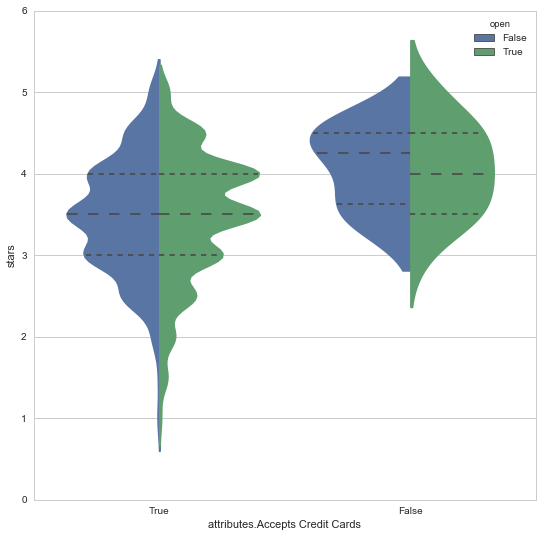

In [24]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='attributes.Accepts Credit Cards',y='stars',hue='open',
               data=food_charlotte_business,split=True,inner="quart")
plt.ylim(0,6)
food_charlotte_business.groupby('attributes.Accepts Credit Cards').describe()

This violin plot compares the distribution of the ratings for restaurants based on whether or not they accept credit cards. The hue represents whether or not they are still in operation. The distribution for those that accept credit cards are very similar for both open and closed restaurants. This could be due to a much larger sample size. Interestingly, the median star rating for closed restaurants that don’t accept credit cards is higher than that of open restaurants that don’t accept credit cards. In addition, the median rating is higher for restaurants that do not accept cards. This could be the result of small owned restaurants that are well run operations.

#### Star Rating By Ambience

In [26]:
trace# How does the ambience of food business affect star rating?
trace = []

for col_name in food_charlotte_business.columns:
    if 'attributes.Ambience' in col_name:
        #food_charlotte_business_attr[col_name] = food_charlotte_business_attr[col_name].astype(bool)
        df = food_charlotte_business.groupby(col_name)
        for key,group in df:
            if key == True:
                trace.append(Box(
                    y = group.stars,
                    name = col_name,
                    marker=dict(size=4,),
                    boxmean = 'sd',
                    line=dict(width=2),
                    ))
layout = Layout(
        title='Star Rating by Ambience',
        titlefont=dict(size=18),
        width = 1000,
        height = 750,
        hovermode='closest',
        yaxis=dict(
            autorange=False,
            range = [0,6],
            showgrid=False,
            zeroline=True,
            title = 'Star Rating',
            showline = True),
        boxmode = 'group',
        boxgroupgap=0.5,
        xaxis = dict(
            title = 'Attributes',
            zeroline = True,
            showline = True),
        #paper_bgcolor='rgb(243, 243, 243)',
        #plot_bgcolor='rgb(243, 243, 243)',
        showlegend=True,
        )

fig = Figure(data=trace, layout=layout)
plot_url = py.plot(fig, filename = 'RatingAmbience', auto_open=False)
tls.get_embed(plot_url,height=1000)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/48.embed" height="1000" width="100%"></iframe>'

#### Star Rating by Delivery

In [27]:
df = food_charlotte_business.groupby('attributes.Delivery')
get_attr_boxplot(df,plot_title = "How does delivery service affect star rating?",
                                xaxis_title = 'Delivery',yaxis_title = 'Star Rating')
df.stars.describe()

attributes.Delivery       
False                count    1602.000000
                     mean        3.449126
                     std         0.715713
                     min         1.000000
                     25%         3.000000
                     50%         3.500000
                     75%         4.000000
                     max         5.000000
True                 count     317.000000
                     mean        3.397476
                     std         0.817951
                     min         1.000000
                     25%         3.000000
                     50%         3.500000
                     75%         4.000000
                     max         5.000000
Name: stars, dtype: float64

The effect of delivery on a rating seems to be minimized. This is probably due to the fact that service applications (like UBER EATS) can make nearly any restaurant into a delivery restaurant thus making this attribute less useful than others for comparison.

#### Star Rating by Price Range

latitude    longitude  review_count        stars
attributes.Price Range                                                           
1.0                    count  1223.000000  1223.000000   1223.000000  1223.000000
                       mean     35.202325   -80.833100     29.078496     3.486100
                       std       0.074511     0.063091     46.990723     0.796506
                       min      35.022718   -81.005171      3.000000     1.000000
                       25%      35.152806   -80.865605      7.000000     3.000000
                       50%      35.212005   -80.841653     15.000000     3.500000
                       75%      35.236246   -80.793528     31.000000     4.000000
                       max      35.377255   -80.654812    571.000000     5.000000
2.0                    count  1252.000000  1252.000000   1252.000000  1252.000000
                       mean     35.190210   -80.832673     62.634185     3.502396
                       std       0.078784     0.056309     94.271020     0.695131
                       min      35.022459   -81.016171      3.000000     1.000000
                       25%      35.145379   -80.852609     10.000000     3.000000
                       50%      35.207232   -80.841148     30.000000     3.500000
                       75%      35.227777   -80.804688     78.000000     4.000000
                       max      35.384064   -80.654704   1121.000000     5.000000
3.0                    count   103.000000   103.000000    103.000000   103.000000
                       mean     35.184993   -80.840279     68.864078     3.616505
                       std       0.063383     0.041318     75.576743     0.653812
                       min      35.031415   -80.984482      3.000000     1.500000
                       25%      35.152405   -80.847471     12.000000     3.500000
                       50%      35.200052   -80.840381     39.000000     3.500000
                       75%      35.225096   -80.825681     88.000000     4.000000
                       max      35.352549   -80.656949    334.000000     5.000000
4.0                    count    18.000000    18.000000     18.000000    18.000000
                       mean     35.213656   -80.817179     37.277778     3.694444
                       std       0.072424     0.041047     53.359828     0.750272
                       min      35.097900   -80.858755      3.000000     1.500000
                       25%      35.152497   -80.846174      5.000000     3.500000
                       50%      35.217620   -80.840127     13.000000     4.000000
                       75%      35.230899   -80.781426     45.250000     4.000000
                       max      35.352128   -80.739259    215.000000     5.000000

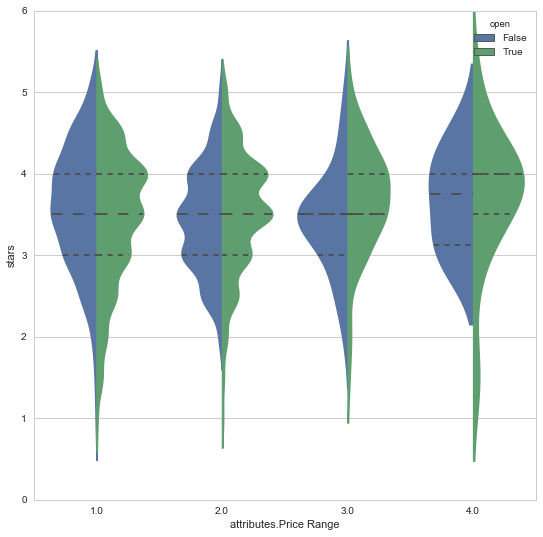

In [28]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='attributes.Price Range',y='stars',hue='open',
               data=food_charlotte_business,split=True,inner="quart")
plt.ylim(0,6)
food_charlotte_business.groupby('attributes.Price Range').describe()

The violin plot suggests that the price doesn’t seem to affect the star rating until the highest price bracket is reached, where the median star rating is higher for businesses that are still operational. The median for out of business restaurants is lower, meaning that overpriced restaurants have a real problem staying in business.

## Analysis of Reviews Dataset

Read the yelp reviews dataset. Sub-sample based on the business id's in the dataframe 'food_charlotte_business'.

In [29]:
reviews = pd.read_csv('./Data/yelp_academic_dataset_review.csv')
food_charlotte_reviews = reviews.loc[reviews['business_id'].isin(food_charlotte_business['business_id'])]
del reviews
food_charlotte_reviews.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
18452,whKpnugMnWTz3UjlrN71yg,5jK4kzMbk5_2uFlW6SBqdQ,In the Pineville area and need a quick breakfa...,1,Gw5POFxBRoJxN_ZYhk6lgQ,1,4,2010-12-31,review,1
18453,4522K1jh68XVpUsPh-5I7A,GLBryAnx1thVohzWc1nV_A,I came here for the first time and was so happ...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,5,2011-07-18,review,0
18454,PM2jXrlVzik1jDwwahLJJQ,ZXPMc6Lc4V7nqknsJ13u9A,This place is an awesome!\n\nThe bagels are fr...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,4,2012-09-19,review,0
18455,naBs2Kg2KClrKcoRgFE2eA,DttWnjejrfXUDiZzC0aFAg,I have mixed feelings about Bruegger's but I s...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,3,2012-12-29,review,0
18456,mHGxSFGMYj4uDap-fcAvaw,zI76vgTW_MxrqEhl31FuZw,Brueggers Bagels when hot and fresh the bagel ...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,3,2013-06-16,review,0


In [30]:
print (food_charlotte_reviews.info())
print (food_charlotte_reviews.dtypes)
print (food_charlotte_reviews.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114343 entries, 18452 to 2685065
Data columns (total 10 columns):
user_id         114343 non-null object
review_id       114343 non-null object
text            114343 non-null object
votes.cool      114343 non-null int64
business_id     114343 non-null object
votes.funny     114343 non-null int64
stars           114343 non-null int64
date            114343 non-null object
type            114343 non-null object
votes.useful    114343 non-null int64
dtypes: int64(4), object(6)
memory usage: 9.6+ MB
None
user_id         object
review_id       object
text            object
votes.cool       int64
business_id     object
votes.funny      int64
stars            int64
date            object
type            object
votes.useful     int64
dtype: object
(114343, 10)


The reviews dataset has 114343 entries and 10 columns.

In [31]:
# Change date to date type
food_charlotte_reviews.date = pd.to_datetime(food_charlotte_reviews['date'])
food_charlotte_reviews.date.dtype

dtype('<M8[ns]')

Merge the reviews dataset with the business dataset on business id's.

In [32]:
food_charlotte_reviews_merge = food_charlotte_reviews.merge(food_charlotte_business,how = 'inner',on= 'business_id')
food_charlotte_reviews_merge.date = pd.to_datetime(food_charlotte_reviews_merge['date'])
food_charlotte_reviews_merge.rename(index = str,columns = {'stars_y':'avg_rating','stars_x':'review_rating'},inplace=True)
food_charlotte_reviews_merge.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,review_rating,date,type_x,votes.useful,attributes.Accepts Credit Cards,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Attire,attributes.Caters,attributes.Delivery,attributes.Good For Groups,attributes.Good For.breakfast,attributes.Good For.brunch,attributes.Good For.dessert,attributes.Good For.dinner,attributes.Good For.latenight,attributes.Good For.lunch,attributes.Good for Kids,attributes.Has TV,attributes.Noise Level,attributes.Outdoor Seating,attributes.Parking.garage,attributes.Parking.lot,attributes.Parking.street,attributes.Parking.valet,attributes.Parking.validated,attributes.Price Range,attributes.Take-out,attributes.Takes Reservations,attributes.Waiter Service,attributes.Wheelchair Accessible,attributes.Wi-Fi,categories,city,full_address,hours.Friday.close,hours.Friday.open,hours.Monday.close,hours.Monday.open,hours.Saturday.close,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,avg_rating,state,type_y,neighborhoods_1,neighborhoods_2
0,whKpnugMnWTz3UjlrN71yg,5jK4kzMbk5_2uFlW6SBqdQ,In the Pineville area and need a quick breakfa...,1,Gw5POFxBRoJxN_ZYhk6lgQ,1,4,2010-12-31,review,1,True,none,False,False,False,False,False,False,False,False,False,casual,True,False,True,False,True,False,False,False,False,True,False,average,True,False,False,False,False,False,1.0,True,False,False,True,free,"['Food', 'Sandwiches', 'Bagels', 'Breakfast & ...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,16:00,5:30,16:00,5:30,16:00,6:00,16:00,6:00,16:00,5:30,16:00,5:30,16:00,5:30,35.089035,-80.867055,Bruegger's Bagels,[],True,17.0,4.0,NC,business,NaN,NaN
1,4522K1jh68XVpUsPh-5I7A,GLBryAnx1thVohzWc1nV_A,I came here for the first time and was so happ...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,5,2011-07-18,review,0,True,none,False,False,False,False,False,False,False,False,False,casual,True,False,True,False,True,False,False,False,False,True,False,average,True,False,False,False,False,False,1.0,True,False,False,True,free,"['Food', 'Sandwiches', 'Bagels', 'Breakfast & ...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,16:00,5:30,16:00,5:30,16:00,6:00,16:00,6:00,16:00,5:30,16:00,5:30,16:00,5:30,35.089035,-80.867055,Bruegger's Bagels,[],True,17.0,4.0,NC,business,NaN,NaN
2,PM2jXrlVzik1jDwwahLJJQ,ZXPMc6Lc4V7nqknsJ13u9A,This place is an awesome!\n\nThe bagels are fr...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,4,2012-09-19,review,0,True,none,False,False,False,False,False,False,False,False,False,casual,True,False,True,False,True,False,False,False,False,True,False,average,True,False,False,False,False,False,1.0,True,False,False,True,free,"['Food', 'Sandwiches', 'Bagels', 'Breakfast & ...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,16:00,5:30,16:00,5:30,16:00,6:00,16:00,6:00,16:00,5:30,16:00,5:30,16:00,5:30,35.089035,-80.867055,Bruegger's Bagels,[],True,17.0,4.0,NC,business,NaN,NaN
3,naBs2Kg2KClrKcoRgFE2eA,DttWnjejrfXUDiZzC0aFAg,I have mixed feelings about Bruegger's but I s...,0,Gw5POFxBRoJxN_ZYhk6lgQ,0,3,2012-12-29,review,0,True,none,False,False,False,False,False,False,False,False,False,casual,True,False,True,False,True,False,False,False,False,True,False,average,True,False,False,False,False,False,1.0,True,False,False,True,free,"['Food', 'Sandwiches', 'Bagels', 'Breakfast & ...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,16:00,5:30,16:00,5:30,16:00,6:00,16:00,6:00,16:00,5:30,16:00,5:30,16:00,5:30,35.089035,-80.867055,Bruegger's Bagels,[],True,17.0,4.0,NC,business,NaN,NaN
4,mHGxSFGMYj4uDap-fcAvaw,zI76vgTW_MxrqEhl31FuZw,Brueggers Bagels when hot and fresh the

### Unique Words Analysis

Get all the reviews for each of the neighbourhood

In [33]:
# Combine all the reviews for a given neighbourhood. 
from collections import defaultdict
group_neighborhood = food_charlotte_reviews_merge.groupby('neighborhoods_1')
review_text_dict = defaultdict(list)
for key,group in group_neighborhood:
    temp_text = [x for x in group.text.tolist()]
    review_text_dict[key].append(temp_text)
review_text_dict[key][0][0:5]

["Great place with some of the best croissants I've had since France.  The cookies are equally as good. \nI haven't had the fruit tarts yet, but they look amazing.\nThe space is fun and comfortable.  It's an old warehouse building in Noda that has been renovated.  This means I'll be by there everyday on my way to work!  :-)\nBut seriously, the croissants are super...light, flakey, and you can taste the butter!!!!",
 'eat the passion fruit ganache.  eat it!',
 "Amelie's is an adorable French bakery near NoDa. My favorites - of which there are many - include the lemon tea cakes, fruit tarts and chocolate mousse cups. \n\nIt's a great place to relax and read a book or meet a friend for pastries and coffee. Amelie's has free wireless, which is a big plus. They stay open late on gallery crawl nights (first and third Fridays) and are hoping to get their wine license.\n\nThey also have a mini-Re-Store featuring antique furniture that's for sale through the Habitat for Humanity Re-Store.",
 'P

In [34]:
#Reference
#http://www.nltk.org/book/
#http://stanford.edu/~rjweiss/public_html/IRiSS2013/text2/notebooks/cleaningtext.html
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

snowball = SnowballStemmer('english')

def clean_text(text_list):
    clean_review = []
    for text in text_list:
        #remove punctuation non alpha-numeric characters
        #regex = re.compile('[%s]' % re.escape(string.punctuation))
        #alpha_numeric = regex.sub(u'', text).lower()
        alpha_numeric = re.sub("[^a-zA-Z]", " ", text)
        #alpha_numeric = re.sub('\n','',alpha_numeric)
        clean_review.append(snowball.stem(alpha_numeric))
    return clean_review

The above code/function cleans the text data by removing all punctuations and keeps only characters. Also, it stems the text using Snowball stemmer from NLTK module.

In [35]:
review_text = {}
for key,value in review_text_dict.items():
    clean_review = clean_text(value[0])
    review_text[key] = clean_review
#print (key)
review_text[key][0:5]

['didn t see too much in particular that i loved about this place  it is very small  and is truly a  grab and go  kind of place amongst the shops in uptown  considering all of the other coffee shops in the area you can find  i would probably skip here and go somewhere else ',
 'since i started working in the area about   weeks ago  i run over to jackson s java about   times a week around      or      pm for an afternoon fix to get me through the work day   it is a nice alternative to the typical starbucks with a large selection of bagels  muffins  scones   biscotti     the menu includes hot cocoa  warm milk   tea as well as a smoothie selection   within the shop itself  it is not the kind of place you bring your laptop or book and stay a while  however it is in the wachovia building which offers several different seating areas   several tables for lounging ',
 'working in uptown you have several options for coffee and they are all big name franchises  starbucks  caribou  einstein and d

In [36]:
# Create bag of words model where the feature is made of a word, stop words are removed
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = defaultdict()
count_vect_dict = defaultdict()

for key,value in review_text.items():
    count_vect = CountVectorizer(stop_words = 'english',
                                 analyzer = 'word') # an object capable of counting words in a document!
    # count_vect.fit(summary_text)
    # count_vect.transform(summary_text)
    #print (len(value))
    bag_words = count_vect.fit_transform(value)
    bag_of_words[key] = bag_words
    count_vect_dict[key] = count_vect    

The above piece of code creates bag of words model for each of the neighbourhoods. Stop words are removed. Bag of words model helps us calculate the frequency of all the words used in the vocabulary.

In [37]:
dist = {}
for key,value in bag_of_words.items():
    feature_array = value.toarray()
    print ("Neighbourhood")
    print (key)
    print ("Vocabulary Count")
    print (len(count_vect_dict[key].vocabulary_))
    
    # Sum up the counts of each vocabulary word
    #dist = np.sum(feature_array, axis=0)
    df = pd.DataFrame(data=feature_array,columns=count_vect_dict[key].get_feature_names())
    dist[key] = df.sum().sort_values()[-300:] # Select the top 300 words by count
    #print (max(dist))
    print ('-----------------------------------')

Neighbourhood
Biddleville
Vocabulary Count
972
-----------------------------------
Neighbourhood
Villa Heights
Vocabulary Count
5855
-----------------------------------
Neighbourhood
Highland Creek
Vocabulary Count
6468
-----------------------------------
Neighbourhood
Derita
Vocabulary Count
4393
-----------------------------------
Neighbourhood
Eastland
Vocabulary Count
10764
-----------------------------------
Neighbourhood
NoDa
Vocabulary Count
14227
-----------------------------------
Neighbourhood
South End
Vocabulary Count
18940
-----------------------------------
Neighbourhood
North Charlotte
Vocabulary Count
2087
-----------------------------------
Neighbourhood
First Ward
Vocabulary Count
14534
-----------------------------------
Neighbourhood
Myers Park
Vocabulary Count
12172
-----------------------------------
Neighbourhood
Ballantyne
Vocabulary Count
16396
-----------------------------------
Neighbourhood
Plaza Midwood
Vocabulary Count
16527
-------------------------------

Create a dataframe from the dictionary with index as words (from the corpus of top 300 words for each neighbourhood)
and columns as the neighbourhood.

In [38]:
dist_df = pd.DataFrame.from_dict(dist)
print (dist_df.shape)
dist_df.head()

(1097, 27)


,Arboretum,Ballantyne,Biddleville,Cotswold,Derita,Dilworth,Eastland,Elizabeth,First Ward,Fourth Ward,Highland Creek,Myers Park,NoDa,North Charlotte,Paw Creek,Plaza Midwood,Quail Hollow,Sedgefield,Sherwood Forest,South End,South Park,Starmount,Steele Creek,Third Ward,University City,Uptown,Villa Heights
abbey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
able,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,280.0,NaN
absolutely,77.0,NaN,NaN,NaN,NaN,NaN,81.0,231.0,192.0,143.0,NaN,133.0,144.0,5.0,NaN,252.0,NaN,30.0,19.0,350.0,456.0,78.0,NaN,NaN,NaN,287.0,51.0
accommodating,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find out unique words for each neighbourhood.

In [39]:
unique_words = defaultdict(list)
unique_words_df = pd.DataFrame()
for index,row in dist_df.iterrows():
    count_not_null = row.notnull().sum()
    if count_not_null == 1:
        unique_words[index].append(row[row.notnull()].to_dict())
        #d = row[row.notnull()].to_frame(name = idx)
        #unique_words_df = unique_words_df.append(d,ignore_index=True)
len(unique_words)

525

There are a total of 523 unique words across all the neighbourhoods.

In [40]:
unique_words_df = []
word = []
for key,value in unique_words.items():
    word.append(key)
    unique_words_df.append(pd.DataFrame.from_dict(value[0],orient='index'))
unique_words_df = pd.concat(unique_words_df)
unique_words_df['unique_word'] = word
unique_words_df.head()

,0,unique_word
Paw Creek,6.0,jin
Quail Hollow,1.0,comfortable
Sherwood Forest,25.0,secret
North Charlotte,6.0,tips
Biddleville,4.0,yams


In [41]:
# Rearrange the dataframe
unique_words_df.reset_index(level=0, inplace=True)
unique_words_df.rename(index = str,columns={"index": "neighborhoods", 0: "word_count"},inplace=True)
unique_words_df.head()

,neighborhoods,word_count,unique_word
0,Paw Creek,6.0,jin
1,Quail Hollow,1.0,comfortable
2,Sherwood Forest,25.0,secret
3,North Charlotte,6.0,tips
4,Biddleville,4.0,yams


In [42]:
unique_words_group = unique_words_df.groupby('neighborhoods')
data = []
buttons = list([
                dict(
                    args=['visible', list(np.repeat(True,len(unique_words_group.keys)))],
                    label='All',
                    method='restyle'
                )])
keys_sorted = sorted(unique_words_group.groups.keys())
for key,group in unique_words_group:
    key_bool = []
    for item in keys_sorted:
        if key == item:
            key_bool.append(True)
        else:
            key_bool.append(False)
            
    trace = Bar(y = group.word_count,
                x = group.unique_word,
               name = key)
    data.append(trace)
    b = dict(args=['visible', key_bool],
                    label=key,
                    method='restyle')
    buttons.append(b)
    
layout = Layout(
    title='Unique words (from top 300 words) by Neighbourhood',
    width = 750,
    height = 1000,
    updatemenus=list([
        dict(
            x=-0.05,
            y=2,
            yanchor='top',
            buttons=buttons)]))
fig = Figure(data = data,layout = layout)
plot_url = py.plot(fig, filename = 'UniqueWords', auto_open=False)
tls.get_embed(plot_url, height=1500)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/52.embed" height="1500" width="100%"></iframe>'

Please use the drop down menu to change/select the neighbourhood

The above plots show the unique words by their neighbourhood and their counts. These unique words help define the neighbourhood. For example, 

1. 'NoDa', we can speculate that it is 'smelly'. We can also speculate that there are a lot places for crepes and that people/reviewers are talking about ales and 'mahi' fish.
2. Dilworth looks like a good neighbourhood for donuts. Reviewers are also specifically talking about the chipotle and starbucks in this area.
3. South Park is famous for cowfish!
4. Villa Heights has one of the famous french bakeries, 'Amelie' and reviews of that neighbourhood prove this point. It looks like a neighbourhood where you get excellent bakery food along with coffee and it also seems to have places to study. This neighbourhood seems to be famous for its cafe's.
5. Arboretum is famous for movie places and gelato!
6. Eastland is famous for korean, thai and eastern foods!
7. Highland Creek is famous for biryani's!

This way, based on people reviews, we can find out what makes a neighbourhood famous. Businesses in the future can select their location based on their type of services. They can also find out what is missing in a neighbourhood and create a business opportunity.

### Votes for reviews

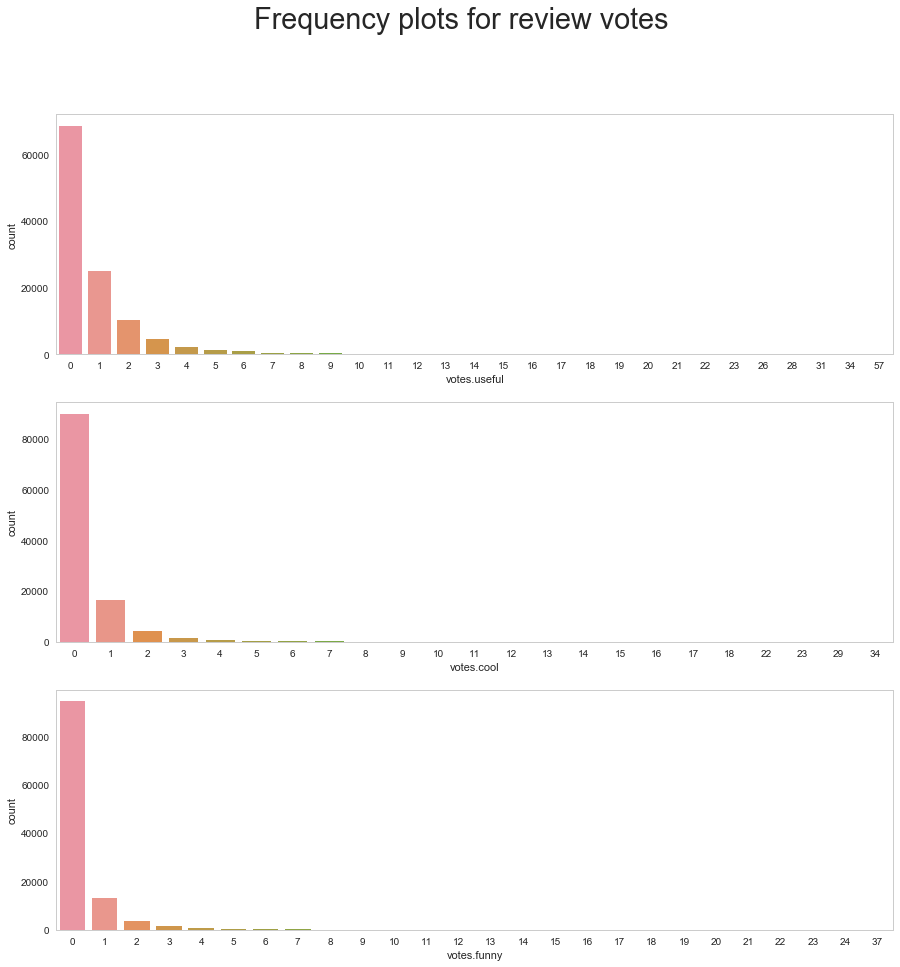

In [43]:
f,(ax1, ax2,ax3) = plt.subplots(3,figsize = (15,15))
sns.set(font_scale = 2)
f.suptitle("Frequency plots for review votes")
sns.set_style("whitegrid")

sns.countplot(x = 'votes.useful', data = food_charlotte_reviews,ax = ax1)
sns.countplot(x = 'votes.cool', data = food_charlotte_reviews,ax = ax2)
sns.countplot(x = 'votes.funny', data = food_charlotte_reviews,ax = ax3)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

Reviews on Yelp can be voted as being 'useful', 'cool' or 'funny'. From the above plots, we can see that the use of this feature is limited. However, we can use this feature to aid in determining the sentiment of the review.

### Monthly average star rating for 'Good', 'Medium' and 'Bad' rating restuarants

Compute the range of the days available in the dataset

In [44]:
food_charlotte_reviews_merge.date.describe()

count                  114343
unique                   3264
top       2016-02-14 00:00:00
freq                      159
first     2004-12-19 00:00:00
last      2016-07-19 00:00:00
Name: date, dtype: object

In [45]:
ts_sub_reviews = food_charlotte_reviews_merge[['date','business_id','avg_rating','review_rating','open']]

Create bins to describe 'Good', 'Medium' and 'Bad' rating as follows:
1. 1-2.33 : "Bad" rating
2. 2.33-3.67 : "Medium" rating
3. 3.67-5 : "Good" rating

In [46]:
bins = np.linspace(ts_sub_reviews.avg_rating.min(), ts_sub_reviews.avg_rating.max(), 4)
ts_sub_reviews['rating_bin'] = pd.cut(ts_sub_reviews.avg_rating,bins,right = True,
                                      labels = ['Bad_Rating','Medium_Rating','Good_Rating'],include_lowest=True)
bins

C:\Users\Raunak Mundada\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



array([ 1.        ,  2.33333333,  3.66666667,  5.        ])

In [47]:
ts_sub_reviews = ts_sub_reviews.sort_values('date')
ts_sub_reviews.head()

,date,business_id,avg_rating,review_rating,open,rating_bin
24890,2004-12-19,MOGTTOxyzfDCj2W5RR7__Q,4.0,4,True,Good_Rating
24110,2005-06-16,Rlbb5bQ1W520xjkLaD9OFQ,4.0,5,True,Good_Rating
24305,2005-06-16,6AzXPSXxztBnGwkToG3jKg,3.5,5,True,Medium_Rating
24712,2005-06-16,5xk2-s_QsnHZxycl5yQ4Gg,3.0,5,True,Medium_Rating
23958,2005-06-18,oQOo1rebP4bieLEEoVHbQg,3.0,5,True,Medium_Rating


Create a series of dates from the start date and end date as defined in the dataset

In [48]:
date_range = pd.date_range('2004-12-19','2016-07-19', freq='D')
date_range

DatetimeIndex(['2004-12-19', '2004-12-20', '2004-12-21', '2004-12-22', '2004-12-23', '2004-12-24', '2004-12-25', '2004-12-26', '2004-12-27', '2004-12-28',
               ...
               '2016-07-10', '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16', '2016-07-17', '2016-07-18', '2016-07-19'], dtype='datetime64[ns]', length=4231, freq='D')

In [49]:
# Group data by their rating bin and whether they are open or closed
ts_group = ts_sub_reviews.groupby(['rating_bin','open'])
ts_group.groups.keys()

dict_keys([('Bad_Rating', False), ('Bad_Rating', True), ('Good_Rating', True), ('Medium_Rating', False), ('Good_Rating', False), ('Medium_Rating', True)])

Compute the daily average of review ratings for each of rating bins. If a given day is not present (i.e. no activity of Yelp users on a particular day), we assume previous days numbers i.e. the ratings are constant if there is no update. 

In [50]:
# Compute the average review rating for each bin created above
ts_temp = pd.DataFrame()
frames = []
data = pd.Series()
for key,value in ts_group:
    for d in date_range:
        x = value[value['date'] == d]
        if x.empty == False:
            data = pd.Series({'date':d,'rating_bin':key[0],
                          'open' : key[1],'avg_review_rating' : x.review_rating.mean()})
        elif data.empty:
            data = pd.Series({'date':d,'rating_bin':key[0],'open':key[1],'avg_review_rating':0})
        else:
            data = pd.Series({'date':d,'rating_bin':key[0],
                          'open' : key[1],'avg_review_rating' : data['avg_review_rating']})
        ts_temp = ts_temp.append(data,ignore_index = True)
    df = ts_temp.set_index('rating_bin','open')
    frames.append(df)
    ts_temp = pd.DataFrame() 
    data = pd.Series()

# Get the required format of the data for plotting
business_closed = pd.DataFrame()
business_open = pd.DataFrame()
for df in frames:
    if df.open.iloc[0] == 0:
        business_closed = business_closed.append(df)
    else:
        business_open = business_open.append(df)
business_closed['rating_bin'] = business_closed.index
business_closed = business_closed.set_index('date')

business_open['rating_bin'] = business_open.index
business_open = business_open.set_index('date')

Compute the monthly average of the daily average review ratings.

In [51]:
df_group = business_closed.groupby('rating_bin').resample('M').mean()
df_group = df_group.reset_index()
df_group = df_group.groupby('rating_bin')

In [52]:
traces = []
for key,group in df_group:
    trace = Scatter(
            x = group.date,
            y = group.avg_review_rating,
            mode = 'lines+markers',
            name = key,
            marker = dict(size = 5))
    traces.append(trace)

layout = Layout(
    title='Star Rating Trend',
    titlefont=dict(size=18),   
    showlegend=True, 
    width=1000,
    height=750,
    hovermode='closest',
    xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=True, title='Date'),
    yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=True,title='Monthly Average Rating',range = [0,6])
)

fig = Figure(data = traces, layout = layout)
plot_url = py.plot(fig, filename = 'RatingTrend', auto_open=False)
tls.get_embed(plot_url, height=1000)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/54.embed" height="1000" width="100%"></iframe>'

The above graph shows the monthly average star rating trend for "Good", "Medium" and "Bad" rating businesses that have closed down. It helps us understand whether the ratings drop towards the closure for the business. As can be seen, for "Good" rating businesses, the monthly average varies less as time progresses (there will be more number of reviews). Although we can see a drop in the ratings towards the end, there is a sudden jump, maybe implying the reason for closure is something else. There can be several reasons that can be attributed for this difference, one being that the high rated restaurants have a different business operating style than the mid rated and shut down suddenly after realizing major losses. In contrast, the mid rated restaurants tend to suffer losses for a longer time and leave the business after a cut-off poor performance. The low rated restaurants follow an expected trend and hardly achieve high ratings throughout their operations.

The assumption while making these observations is that all businesses (i.e. coffee house, restaurants, bars etc.) with similar overall average rating behave in a similar manner over time. Even though this is not true, it gives an overall picture of how on average, the rating trend may affect or force the closure of a business. The businesses can then focus on their Yelp ratings and maybe also look into their social marketing strategy.

## User Data Analysis

In [53]:
user = pd.read_csv('./Data/yelp_academic_dataset_user.csv')
food_charlotte_user = user.loc[user['user_id'].isin(food_charlotte_reviews['user_id'])]
del user
food_charlotte_user.head()

,yelping_since,compliments.plain,review_count,friends,compliments.cute,compliments.writer,fans,compliments.note,type,compliments.hot,compliments.cool,compliments.profile,average_stars,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
24,2011-01,NaN,3,[],NaN,NaN,0,NaN,user,NaN,NaN,NaN,3.67,NaN,[],Jess,Yt4bcTwDMDCGSD2eQHxazw,0,NaN,1,NaN,NaN,3
32,2011-09,NaN,3,"['8S-UrKLKRsJhv6mfpCV7lQ', 'Icc_dfH0FA5CcH12g4...",NaN,NaN,0,NaN,user,NaN,NaN,NaN,1.00,NaN,[],Chris,9VjrmRRwAkiuEvt8UxSw1Q,0,NaN,1,NaN,NaN,6
58,2013-10,NaN,2,[],NaN,NaN,0,NaN,user,NaN,NaN,NaN,5.00,NaN,[],Juan,NSHoWa7SjbWVwZveI7joVQ,1,NaN,0,NaN,NaN,1
63,2014-04,NaN,3,[],NaN,NaN,0,NaN,user,NaN,NaN,NaN,4.67,NaN,[],Dan,WbeUV41fKMLJTKFSv-sWoQ,4,NaN,0,NaN,NaN,5
111,2010-08,NaN,18,['Prsk7SiPZNfgcPyygOdGHg'],NaN,NaN,2,1.0,user,NaN,NaN,NaN,4.35,NaN,[],Brianna,HN6NvF8R_FWkVAl_jCxncA,3,NaN,0,NaN,NaN,13


In [54]:
print (food_charlotte_user.info())
print (food_charlotte_user.dtypes)
print (food_charlotte_user.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34008 entries, 24 to 686517
Data columns (total 23 columns):
yelping_since          34008 non-null object
compliments.plain      7678 non-null float64
review_count           34008 non-null int64
friends                34008 non-null object
compliments.cute       1231 non-null float64
compliments.writer     5563 non-null float64
fans                   34008 non-null int64
compliments.note       6722 non-null float64
type                   34008 non-null object
compliments.hot        4463 non-null float64
compliments.cool       6113 non-null float64
compliments.profile    1557 non-null float64
average_stars          34008 non-null float64
compliments.more       3982 non-null float64
elite                  34008 non-null object
name                   34008 non-null object
user_id                34008 non-null object
votes.cool             34008 non-null int64
compliments.list       898 non-null float64
votes.funny            34008 non-null

### Correlation Matrix for users and it's attributes

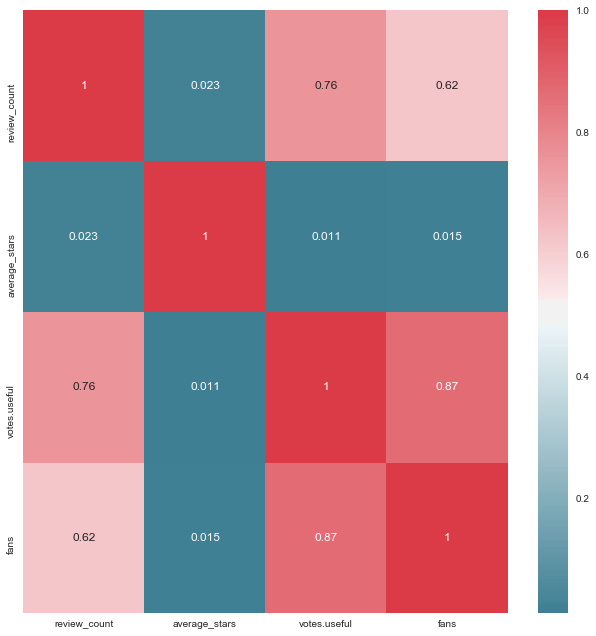

In [55]:
yelp_user = food_charlotte_user[['review_count','average_stars','votes.useful','fans']]
# plot the correlation matrix using seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(yelp_user.corr(), cmap=cmap, annot=True)
f.tight_layout()

The correlation matrix shows correlations between review count by each user, average star rating given by that user, 
Useful votes count the reviews received and number of fans following that user. 
As seen, there exists a strong correlations between review counts, useful review votes (showing the motivation reviewer receives for writing reviews) and number of fans. This is expected as more number of people will follow the reviewer if the reviews are useful. However, there is almost no correlation in his fan following and the average star rating the reviewer gives to businesses.


In [56]:
elite_bool = []
for item in food_charlotte_user.elite:
    if item == '[]':
        elite_bool.append(False)
    else:
        elite_bool.append(True)

In [57]:
food_charlotte_user['elite_bool'] = elite_bool
food_charlotte_user.elite_bool.value_counts()

False    31041
True      2967
Name: elite_bool, dtype: int64

As expected there are about 91% users are non-elite and the rest are elite users

### Distribution of the average star ratings for user v/s elite and non-elite users

(0, 6)

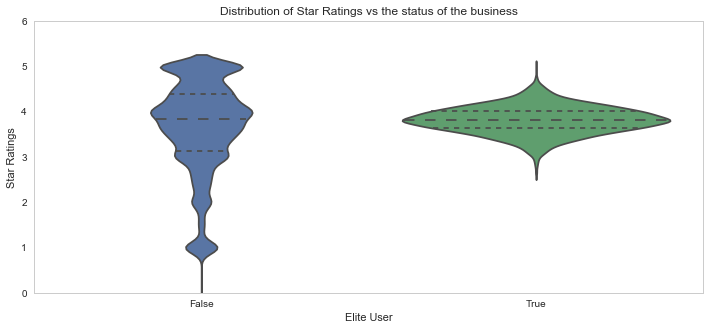

In [58]:
#violin plot for star rating for elite vs non-elite users
sns.set(font_scale = 1)
sns.set_context({"figure.figsize": (12, 5)})
sns.set_style("whitegrid")

g = sns.violinplot(x='elite_bool',y = 'average_stars', data = food_charlotte_user,inner="quart")

plt.title("Distribution of Star Ratings vs the status of the business")
plt.xlabel('Elite User')
plt.ylabel('Star Ratings')
g.axes.grid('off')
plt.ylim(0, 6)

### Total review count by the eliteness of the user

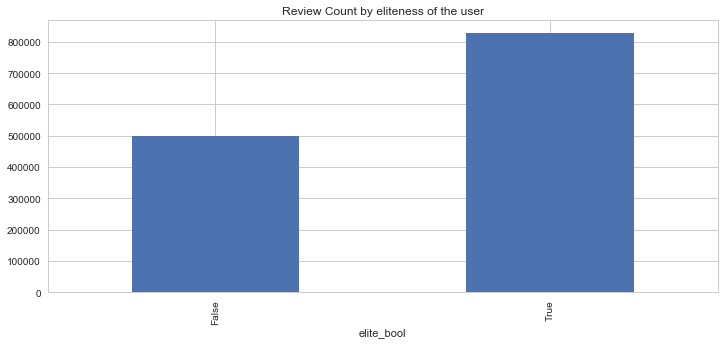

In [59]:
sns.set_context({"figure.figsize": (12, 5)})
df = food_charlotte_user.groupby('elite_bool')
df.review_count.sum().plot(kind = 'bar')
plt.title('Review Count by eliteness of the user')

As expected, elite users have written more reviews than the non-elite users

## Check-in Data Analysis

In [60]:
checkin = pd.read_csv('./Data/yelp_academic_dataset_checkin.csv')
food_charlotte_checkin = checkin.loc[checkin['business_id'].isin(food_charlotte_business['business_id'])]
del checkin
food_charlotte_checkin.head()

,checkin_info.9-0,checkin_info.9-1,checkin_info.9-2,checkin_info.9-3,checkin_info.9-4,checkin_info.9-5,checkin_info.9-6,checkin_info.20-2,checkin_info.20-3,checkin_info.20-0,checkin_info.20-1,checkin_info.20-6,checkin_info.20-4,checkin_info.20-5,business_id,checkin_info.12-1,checkin_info.12-0,checkin_info.12-3,checkin_info.12-2,checkin_info.12-5,checkin_info.12-4,checkin_info.12-6,checkin_info.2-1,checkin_info.15-6,checkin_info.15-4,checkin_info.15-5,checkin_info.15-2,checkin_info.15-3,checkin_info.15-0,checkin_info.15-1,checkin_info.17-1,checkin_info.1-1,checkin_info.22-4,checkin_info.22-5,checkin_info.22-6,checkin_info.22-0,checkin_info.22-1,checkin_info.22-2,checkin_info.22-3,checkin_info.2-0,checkin_info.11-2,checkin_info.11-3,checkin_info.11-0,checkin_info.11-1,checkin_info.11-6,checkin_info.11-4,checkin_info.11-5,checkin_info.16-5,checkin_info.16-4,checkin_info.16-6,...,checkin_info.14-0,checkin_info.14-6,checkin_info.14-5,checkin_info.14-4,checkin_info.13-4,checkin_info.13-5,checkin_info.13-6,checkin_info.13-0,checkin_info.13-1,checkin_info.13-2,checkin_info.13-3,checkin_info.10-6,checkin_info.10-5,checkin_info.10-4,checkin_info.10-3,checkin_info.10-2,checkin_info.10-1,checkin_info.10-0,checkin_info.3-5,checkin_info.23-1,checkin_info.23-0,checkin_info.23-3,checkin_info.23-2,checkin_info.23-5,checkin_info.23-4,checkin_info.23-6,checkin_info.3-0,checkin_info.0-5,checkin_info.0-4,checkin_info.0-6,checkin_info.0-1,checkin_info.0-0,checkin_info.0-3,checkin_info.0-2,checkin_info.3-6,checkin_info.6-6,checkin_info.3-4,checkin_info.6-4,checkin_info.6-3,checkin_info.3-3,checkin_info.6-1,checkin_info.6-0,checkin_info.3-1,checkin_info.18-6,checkin_info.18-5,checkin_info.18-4,checkin_info.18-3,checkin_info.18-2,checkin_info.18-1,checkin_info.18-0
631,NaN,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gw5POFxBRoJxN_ZYhk6lgQ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,4.0,5.0,5.0,8.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LT0AgHTpDifuHSXgyLmJwg,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,4.0,2.0,5.0,3.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,2.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5j704vZBOmW88yJLhnCOEA,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USdRzNk14UdjZWFgBJb0wA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
674,14.0,9.0,10.0,9.0,15.0,12.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5.0,ePP0Eqz8JKSbtdt2phiB4A,2.0,1.0,NaN,3.0,14.0,3.0,NaN,NaN,1.0,7.0,21.0,16.0,8.0,6.0,8.0,8.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,1.0,NaN,7.0,11.0,20.0,21.0,2.0,...,3.0,NaN,9.0,7.0,5.0,5.0,NaN,1.0,NaN,NaN,4.0,2.0,13.0,9.0,5.0,7.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,10.0,16.0,7.0,8.0,4.0,5.0


Column name format - 
checkin_info.9-4: Number of check-ins from 9am-10am on Thursday
> * 0 - Sunday
> * 1 - Monday
> * 2 - Tuesday
> * 3 - Wednesday
> * 4 - Thursday
> * 5 - Friday
> * 6 - Saturday

In [61]:
print (food_charlotte_checkin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 631 to 61026
Columns: 170 entries, checkin_info.9-0 to checkin_info.18-0
dtypes: float64(168), object(2)
memory usage: 3.2+ MB
None


In [62]:
food_charlotte_checkin_merge = food_charlotte_checkin.merge(food_charlotte_business,how = 'inner',on= 'business_id')
# food_charlotte_reviews_merge.date = pd.to_datetime(food_charlotte_reviews_merge['date'])
# food_charlotte_reviews_merge.rename(index = str,columns = {'stars_y':'avg_rating','stars_x':'review_rating'},inplace=True)
food_charlotte_checkin_merge.head()

,checkin_info.9-0,checkin_info.9-1,checkin_info.9-2,checkin_info.9-3,checkin_info.9-4,checkin_info.9-5,checkin_info.9-6,checkin_info.20-2,checkin_info.20-3,checkin_info.20-0,checkin_info.20-1,checkin_info.20-6,checkin_info.20-4,checkin_info.20-5,business_id,checkin_info.12-1,checkin_info.12-0,checkin_info.12-3,checkin_info.12-2,checkin_info.12-5,checkin_info.12-4,checkin_info.12-6,checkin_info.2-1,checkin_info.15-6,checkin_info.15-4,checkin_info.15-5,checkin_info.15-2,checkin_info.15-3,checkin_info.15-0,checkin_info.15-1,checkin_info.17-1,checkin_info.1-1,checkin_info.22-4,checkin_info.22-5,checkin_info.22-6,checkin_info.22-0,checkin_info.22-1,checkin_info.22-2,checkin_info.22-3,checkin_info.2-0,checkin_info.11-2,checkin_info.11-3,checkin_info.11-0,checkin_info.11-1,checkin_info.11-6,checkin_info.11-4,checkin_info.11-5,checkin_info.16-5,checkin_info.16-4,checkin_info.16-6,...,attributes.Good For Groups,attributes.Good For.breakfast,attributes.Good For.brunch,attributes.Good For.dessert,attributes.Good For.dinner,attributes.Good For.latenight,attributes.Good For.lunch,attributes.Good for Kids,attributes.Has TV,attributes.Noise Level,attributes.Outdoor Seating,attributes.Parking.garage,attributes.Parking.lot,attributes.Parking.street,attributes.Parking.valet,attributes.Parking.validated,attributes.Price Range,attributes.Take-out,attributes.Takes Reservations,attributes.Waiter Service,attributes.Wheelchair Accessible,attributes.Wi-Fi,categories,city,full_address,hours.Friday.close,hours.Friday.open,hours.Monday.close,hours.Monday.open,hours.Saturday.close,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type_y,neighborhoods_1,neighborhoods_2
0,NaN,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gw5POFxBRoJxN_ZYhk6lgQ,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,True,False,True,False,False,False,False,True,False,average,True,False,False,False,False,False,1.0,True,False,False,True,free,"['Food', 'Sandwiches', 'Bagels', 'Breakfast & ...",Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,16:00,5:30,16:00,5:30,16:00,6:00,16:00,6:00,16:00,5:30,16:00,5:30,16:00,5:30,35.089035,-80.867055,Bruegger's Bagels,[],True,17.0,4.0,NC,business,NaN,NaN
1,4.0,5.0,5.0,8.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LT0AgHTpDifuHSXgyLmJwg,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,True,True,False,average,False,False,False,True,False,False,1.0,True,False,False,True,no,"['American (Traditional)', 'Hot Dogs', 'Breakf...",Charlotte,"309 W 4th St\nCharlotte, NC 28202",15:00,7:30,15:00,7:30,14:00,9:30,NaN,NaN,15:00,7:30,15:00,7:30,15:00,7:30,35.228193,-80.846592,Green's Lunch,[],True,44.0,3.5,NC,business,NaN,NaN
2,NaN,2.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5j704vZBOmW88yJLhnCOEA,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,2.0,NaN,NaN,NaN,NaN,free,"['Food', 'Coffee & Tea']",Charlotte,"401 S Tryon St\nUptown\nCharlotte, NC 28202",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.224616,-80.846425,Jackson's Java,['Uptown'],True,14.0,3.5,NC,business,Uptown,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USdRzNk14UdjZWFgBJb0wA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,True,False,False,False,True,False,False,False,False,quiet,False,False,False,False,True,False,4.0,False,True,True,NaN,no,"['American (New)', 'Southern', 'F

In [63]:
map_days = {'0':'Sunday',
           '1':'Monday',
           '2':'Tuesday',
           '3':'Wednesday',
           '4':'Thursday',
           '5':'Friday',
           '6':'Saturday'}
# checkin_neighbourhood = defaultdict(list)
checkin_neighbourhood = []
for col_name in food_charlotte_checkin_merge.columns:
    if 'checkin' in col_name:
        temp = col_name.split('info.')[1].split('-')
        hr = temp[0]
        day = temp[1]
        for row in food_charlotte_checkin_merge.iterrows():
            row = row[1]
            if 5<=int(hr)<11:
                section_day = 'Morning'
            elif 11<=int(hr)<16:
                section_day = 'Afternoon'
            else:
                section_day = 'Evening'
            checkin_neighbourhood.append([row.neighborhoods_1,map_days[day],section_day,row[col_name]])

In [64]:
checkin_neighbourhood = pd.DataFrame(checkin_neighbourhood,
                                     columns=['Neighbourhood','Weekday','Section_Day','Checkin_count'])
checkin_neighbourhood.head()

,Neighbourhood,Weekday,Section_Day,Checkin_count
0,NaN,Sunday,Morning,NaN
1,NaN,Sunday,Morning,4.0
2,Uptown,Sunday,Morning,NaN
3,Fourth Ward,Sunday,Morning,NaN
4,Fourth Ward,Sunday,Morning,14.0


In [65]:
checkin_grouped = checkin_neighbourhood.groupby(['Neighbourhood','Weekday','Section_Day'])
checkin_neighbourhood_agg = checkin_grouped.aggregate(np.mean).groupby(level = 0)

trace_data = []
buttons = list([
                dict(
                    args=['visible', list(np.repeat(True,len(checkin_neighbourhood_agg.groups.keys())))],
                    label='All',
                    method='restyle'
                )])
keys_sorted = sorted(checkin_neighbourhood_agg.groups.keys())

for ng, new_df in checkin_neighbourhood_agg:
    key_bool = []
    for item in keys_sorted:
        if ng == item:
            key_bool.append(True)
        else:
            key_bool.append(False)
    new_df.reset_index(inplace = True)

    for key,group in new_df.groupby('Section_Day'):
        trace = Bar(x = group.Weekday,
                    y = group.Checkin_count)
        trace_data.append(trace)
    b = dict(args=['visible', key_bool],
                    label=ng,
                    method='restyle')
    buttons.append(b)

layout = Layout(
    title='Average Check-in for a neighborhood',
    width = 750,
    height = 1000,
    barmode = 'group',
    bargap=0.15,
    showlegend = False,
    updatemenus=list([
        dict(
            x=-0.05,
            y=2,
            yanchor='top',
            buttons=buttons)]))

fig = Figure(data = trace_data,layout = layout)
plot_url = py.plot(fig, filename = 'CheckIn', auto_open=False)
tls.get_embed(plot_url,height=1500)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~raunakm90/56.embed" height="1500" width="100%"></iframe>'

## Further Analysis

To enhance the results of our prediction and classification models, it’s desirable to have the data of generated revenues by the restaurant (or a related proxy). The closing date of a restaurant is also significant and thus a similar data can be useful. Other features that could have been added to the dataset includes tables turned per night, revenue generation by hour, capacity etc. Other features, that can be extracted from the existing attributes for our analysis are the day of week of checkin (using the checkin code), the time of the day (eg. from 6 pm to 10 pm can be termed as dinner time and 10 pm to 2 am can be termed as late night) and the core sentiment of the text review.